# Lab assignment: news articles classification

<img src="img/news.jpg" style="width:800px;">

In this assignment we will face a text classification problem, trying to categorize news articles based on their headlines and short descriptions. The dataset given for this task contains around 200k news headlines from the year 2012 to 2018 obtained from [HuffPost](https://www.huffpost.com/) and they are classified into 41 different categories.

## Task summary

- Classify each news article in one of the 10 most common categories and follow the instructions to answer the questions. Only use the train data to fit the model. To measure the quality of the classification model, you can use the test data set, but it is important to note that these data can only be used to evaluate the classifier. This implies that the test data cannot be used to perform cross-validation techniques or to train text vectorizers.
- The objective is obtain **the best ROC AUC score** in the test set. In this kind of unbalanced problems it is better to make use of the ROC AUC score which takes into account the importance of all classes.
- You can use any library and model explained in the course. It will be evaluated the **quality of the code**.
- The delivery are a unique jupiter notebook with all the code. Should run in the course Anaconda deeplearning environment.
- Send the notebook named **homework\_[name]\_[surname]-text-mining.ipynb**.


In [ ]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local


--2023-12-19 10:01:18--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141672045 (135M) [text/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 135.11M   181MB/s    in 0.7s    

2023-12-19 10:01:19 (181 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [141672045/141672045]

PREFIX=/usr/local
Unpacking payload ...
                                                                                           
Installing base environment...





Preparing transaction: - \ | / - \ done
Executing transaction: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>

To do the task, you should use the **conda environment used for deeplearning classes**. To install it:

    conda env create -f environment-deeplearning.yml deeplearning-labs
    conda ativate deeplearning-labs

After installing it, **make sure to have the jupyter kernel set with this environment**.

*(optional)* If you would like to use additional Python packages that might not be installed in this conda environment, you can install new Python packages after you have activated it with

    conda install PACKAGENAME
    
if the package is in Anaconda repository. Else you should use

    pip install PACKAGENAME
    
If that is the case, you have to list bellow all the new packages used and versions installed:

* Package1: ...
* ...

In [ ]:
!conda env create -f environment-deeplearning.yml

In [ ]:
!source activate deeplearning-labs

The following code will embed any plots into the notebook instead of generating a new window:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells.

Let's go!

## Preliminaries: data loading

In this assignment we will work with the news articles data contained in the following file:

In [97]:
data = "./data/News_Category_Dataset_v2.json"

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
     Load the data into Pandas DataFrames with name <b>df_news</b>.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Take advantage of a Pandas function to read a json as a Pandas DataFrame
 </td></tr>
</table>

In [98]:
#### INSERT YOUR CODE HERE
import pandas as pd


# Read the JSON data from the file
with open(data, 'r') as file:
    json_data = file.read()

# Add square brackets to make the data a valid JSON list
json_data = '[' + json_data.strip().replace('\n', ',') + ']'

# Read JSON data into a DataFrame
df_news = pd.read_json(json_data)

# Display the DataFrame
print(df_news)

             category                                           headline  \
0               CRIME  There Were 2 Mass Shootings In Texas Last Week...   
1       ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2       ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3       ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4       ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   
...               ...                                                ...   
200848           TECH  RIM CEO Thorsten Heins' 'Significant' Plans Fo...   
200849         SPORTS  Maria Sharapova Stunned By Victoria Azarenka I...   
200850         SPORTS  Giants Over Patriots, Jets Over Colts Among  M...   
200851         SPORTS  Aldon Smith Arrested: 49ers Linebacker Busted ...   
200852         SPORTS  Dwight Howard Rips Teammates After Magic Loss ...   

                 authors                                               link  \
0       

<table>
 <tr>
  <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
      Explore the dataset and show how many news are in each category. After that, create a variable called <b>commoncat</b> that is a list of the 10 most common categories and filter df_news to have just these categories and call the dataframe as <b>df_filter</b>.
  </td>
 </tr>
</table>

In [ ]:
#### INSERT YOUR CODE HERE

category_counts = df_news['category'].value_counts()
print("Number of news articles in each category:")
print(category_counts)

Number of news articles in each category:
POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     103

In [99]:
# Create a variable commoncat with the 10 most common categories
commoncat = category_counts.head(10).index.tolist()

In [100]:
# Filter df_news to include only the 10 most common categories
df_filter = df_news[df_news['category'].isin(commoncat)]

# Display the filtered DataFrame
print("\nFiltered DataFrame (df_filter):")
print(df_filter)


Filtered DataFrame (df_filter):
             category                                           headline  \
1       ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2       ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3       ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4       ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   
5       ENTERTAINMENT  Morgan Freeman 'Devastated' That Sexual Harass...   
...               ...                                                ...   
200835       BUSINESS            Walmart Waving Goodbye To Some Greeters   
200836       BUSINESS  At World Economic Forum, Fear of Global Contag...   
200837       BUSINESS  Positive Customer Experience: What's the Retur...   
200838  ENTERTAINMENT  Sundance, Ice-T, and Shades of the American Ra...   
200839  ENTERTAINMENT  'Girl With the Dragon Tattoo' India Release Ca...   

                                                  auth

<table align="left">
 <tr>
  <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
      Remove all duplicated rows with same <b>headline</b> and <b>short_description</b> columns in <b>df_filter</b>.
  </td>
 </tr>
</table>

In [101]:
#### INSERT YOUR CODE HERE
# Remove duplicated rows based on 'headline' and 'short_description'
df_filter = df_filter.drop_duplicates(subset=['headline', 'short_description'])
print(df_filter)

             category                                           headline  \
1       ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2       ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3       ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4       ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   
5       ENTERTAINMENT  Morgan Freeman 'Devastated' That Sexual Harass...   
...               ...                                                ...   
200835       BUSINESS            Walmart Waving Goodbye To Some Greeters   
200836       BUSINESS  At World Economic Forum, Fear of Global Contag...   
200837       BUSINESS  Positive Customer Experience: What's the Retur...   
200838  ENTERTAINMENT  Sundance, Ice-T, and Shades of the American Ra...   
200839  ENTERTAINMENT  'Girl With the Dragon Tattoo' India Release Ca...   

                                                  authors  \
1                         

<table align="left">
 <tr>
  <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">      Create a variable called <b>X</b> with all the values of <b>headline</b> and <b>short_description</b> columns and a variable called <b>y</b> with the values of <b>category</b> column.
  </td>
 </tr>
</table>

In [102]:
#### INSERT YOUR CODE HERE

# Create variables X and y
X = df_filter[['headline', 'short_description']]
y = df_filter['category']

# Display X and y
print("\nVariable X:")
print(X)

print("\nVariable y:")
print(y)


Variable X:
                                                 headline  \
1       Will Smith Joins Diplo And Nicky Jam For The 2...   
2         Hugh Grant Marries For The First Time At Age 57   
3       Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4       Julianna Margulies Uses Donald Trump Poop Bags...   
5       Morgan Freeman 'Devastated' That Sexual Harass...   
...                                                   ...   
200835            Walmart Waving Goodbye To Some Greeters   
200836  At World Economic Forum, Fear of Global Contag...   
200837  Positive Customer Experience: What's the Retur...   
200838  Sundance, Ice-T, and Shades of the American Ra...   
200839  'Girl With the Dragon Tattoo' India Release Ca...   

                                        short_description  
1                                Of course it has a song.  
2       The actor and his longtime girlfriend Anna Ebe...  
3       The actor gives Dems an ass-kicking for not fi...  
4       The "D

<table align="left">
 <tr>
  <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">      Next we are going to separate the data into one set to train the model and another to make the predictions. Split X and y into random train and test subsets calling them <b>X_train</b>, <b>X_test</b>, <b>y_train</b> and <b>y_test</b> respectively. Use the random seed and test size which are given bellow:
  </td>
 </tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
scikit-learn can help you!
 </td></tr>
</table>

In [103]:
#### INSERT YOUR CODE HERE
random_state=42
test_size=0.3

from sklearn.model_selection import train_test_split

# Assuming you already have X and y from the previous code

# Split X and y into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting subsets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (83862, 2)
X_test shape: (35942, 2)
y_train shape: (83862,)
y_test shape: (35942,)


<table align="left">
 <tr>
  <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">      In order to enter the category labels in the model, it is necessary to code them numerically. So, translate <b>y_train</b> and after that, <b>y_test</b> to be numeric.
  </td>
 </tr>
</table>

<table align="left">




 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
scikit-learn can help you! May be you need to transform labels in two different ways depending on the model used and the way to calculate roc auc score.
 </td></tr>
</table>

In [104]:
#### INSERT YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels (y_train)
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the testing labels (y_test)
y_test_encoded = label_encoder.transform(y_test)

# Display the unique encoded labels
print("Encoded Labels:", label_encoder.classes_)

# Display the first few elements of the transformed labels
print("\ny_train_encoded:")
print(y_train_encoded[:5])

# Display the first few elements of the transformed labels for testing set
print("\ny_test_encoded:")
print(y_test_encoded[:5])

Encoded Labels: ['BUSINESS' 'ENTERTAINMENT' 'FOOD & DRINK' 'HEALTHY LIVING' 'PARENTING'
 'POLITICS' 'QUEER VOICES' 'STYLE & BEAUTY' 'TRAVEL' 'WELLNESS']

y_train_encoded:
[5 5 5 6 7]

y_test_encoded:
[0 2 5 5 6]


Now, we are ready to train the model!

In [105]:
# Custom transformer to combine 'headline' and 'short_description' into a single feature
class CombineText(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X['headline'] + ' ' + X['short_description']

# Create an instance of the CombineText transformer
combine_text_transformer = CombineText()

# Apply the transformer to the DataFrame
combined_text_result_train = combine_text_transformer.fit_transform(X_train)
combined_text_result_test = combine_text_transformer.fit_transform(X_test)

# Add the result as a new column to the DataFrame
X_train['combined_text'] = combined_text_result_train
X_test['combined_text'] = combined_text_result_test

# Display the updated DataFrame
print(X_train)
print(X_test)


                                                 headline  \
38292   House Republicans Drop Efforts To Gut Ethics W...   
890     NY Legislature Has Plan In Place To Consider R...   
53978   House Democrats Demanded Action On Guns, But A...   
41030   Queer Teens Juggle Identity And Conformity in ...   
137394  You're a 21st Century Shopper, Stop Overpaying...   
...                                                   ...   
140434                  The Best Butcher Shops in America   
187216  Getting The Best Of Ireland, Including Golf Ge...   
178067  Soul Songs: An Inspirational Playlist For Rain...   
1293    7 Places Prince Harry And Meghan Markle Might ...   
26407   AG Reverses Predecessor’s Memo Easing Drug Cri...   

                                        short_description  \
38292   Lawmakers, watchdog groups and the president-e...   
890     A bipartisan committee will look at successors...   
53978   These 10 fatal incidents help illustrate just ...   
41030   The clip aims t

In [106]:
X_train.head()

,headline,short_description,combined_text
38292,House Republicans Drop Efforts To Gut Ethics W...,"Lawmakers, watchdog groups and the president-e...",House Republicans Drop Efforts To Gut Ethics W...
890,NY Legislature Has Plan In Place To Consider R...,A bipartisan committee will look at successors...,NY Legislature Has Plan In Place To Consider R...
53978,"House Democrats Demanded Action On Guns, But A...",These 10 fatal incidents help illustrate just ...,"House Democrats Demanded Action On Guns, But A..."
41030,Queer Teens Juggle Identity And Conformity in ...,The clip aims to help youth tell their stories...,Queer Teens Juggle Identity And Conformity in ...
137394,"You're a 21st Century Shopper, Stop Overpaying...",When did we start becoming such passive shoppe...,"You're a 21st Century Shopper, Stop Overpaying..."


In [ ]:
columns_to_drop = ['headline', 'short_description']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

## Model based on characters

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Build a classification model using training data. Use only characteristics based on the <b>characters</b> in the text. You can try different vectorizers and combinations of parameters. Evaluate the model on the test set. What ROC AUC score can you achieve?</td></tr>
</table>

<table>
<tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Note that each news articles includes two text fields, <i> headline </i> and <i> short_description </i>. It is recommended that you build a model that analyzes both texts to make the decision. You can build a Pipeline that takes both data inputs into account using <a href=https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html>ColumnTransformer</a> or join them in a single string.</td></tr>
</table>

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import auc

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import itertools


ROC AUC Score: 0.9023653474470364
Class 0: ROC AUC = 0.85
Class 1: ROC AUC = 0.91
Class 2: ROC AUC = 0.93
Class 3: ROC AUC = 0.84
Class 4: ROC AUC = 0.92
Class 5: ROC AUC = 0.93
Class 6: ROC AUC = 0.90
Class 7: ROC AUC = 0.94
Class 8: ROC AUC = 0.90
Class 9: ROC AUC = 0.91


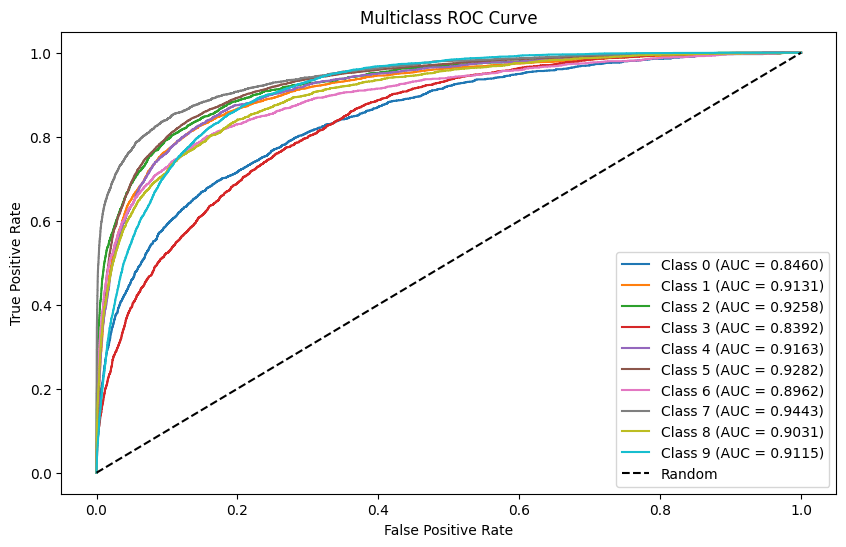

In [45]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_extraction.text import TfidfVectorizer

model = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer="char", ngram_range=(1, 2))),
    ('classifier', CalibratedClassifierCV(base_estimator=SGDClassifier(max_iter=1), method='sigmoid'))
])

model.fit(X_train['combined_text'], y_train)

# Get the probability scores for each class
y_pred_proba = model.predict_proba(X_test['combined_text'])

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Display the ROC AUC score
print("ROC AUC Score:", roc_auc)

# Calculate and print the ROC AUC score for each class
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    print(f'Class {i}: ROC AUC = {roc_auc:.2f}')

plt.figure(figsize=(10, 6))
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

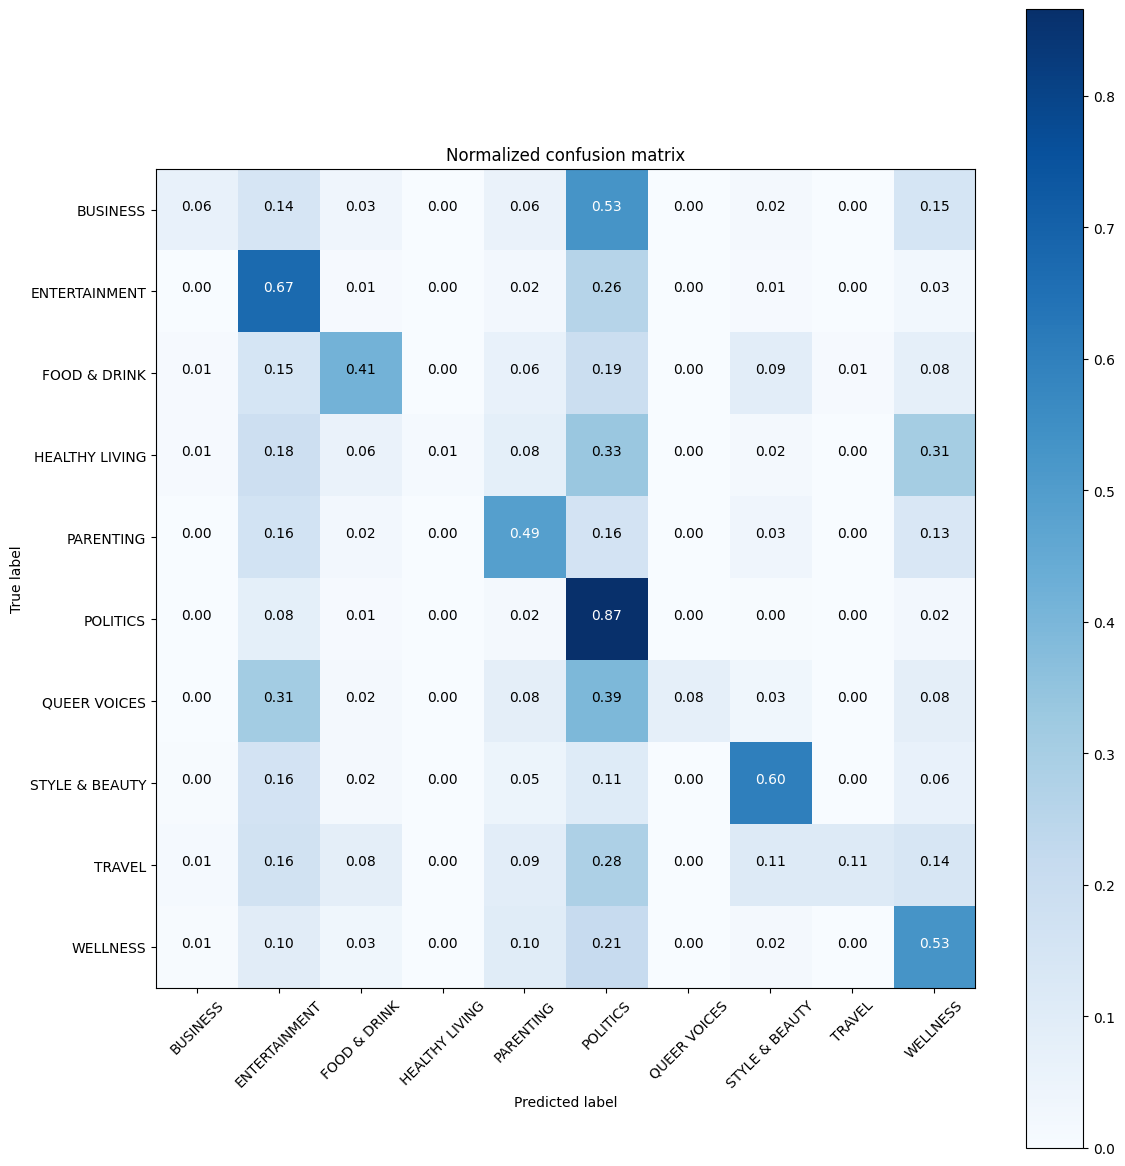

In [43]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

## Model based on tokens (words)

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Build a classification model using training data. Use only characteristics based on the <b>tokens</b> of the text. You can try different vectorizers and combinations of parameters. Evaluate the model on the test set. What ROC AUC score you achieve?</td></tr>
</table>

<table>
<tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Note that each news articles includes two text fields, <i> headline </i> and <i> short_description </i>. It is recommended that you build a model that analyzes both texts to make the decision. You can build a Pipeline that takes both data inputs into account using <a href=https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html>ColumnTransformer</a> or join them in a single string.</td></tr>
</table>

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [48]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


In [57]:
pipeline_tfidf = Pipeline([
    ('vectorizer', TfidfVectorizer())
])

pipeline_lda = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('lda', LatentDirichletAllocation(n_components=10))
])

In [63]:
from sklearn.pipeline import FeatureUnion

model = Pipeline([
    ('merger', FeatureUnion([
        ('tfidf_pipeline', pipeline_tfidf),
        ('topics_pipeline', pipeline_lda),
    ])),
    ('classifier', LinearSVC())
])

In [64]:
model.fit(X_train['combined_text'], y_train_encoded)
acc = model.score(X_test['combined_text'], y_test_encoded)
print("Accuracy on test data", acc)

Accuracy on test data 0.8015970174169496


In [67]:
from sklearn.metrics import roc_auc_score

# Fit the model
model.fit(X_train['combined_text'], y_train_encoded)


# Calibrate the model
calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train['combined_text'], y_train_encoded)

# Predict probabilities
y_pred_prob_token = calibrated_model.predict_proba(X_test['combined_text'])

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob_token, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9615730243807263


Class 0: ROC AUC = 0.9411
Class 1: ROC AUC = 0.9734
Class 2: ROC AUC = 0.9821
Class 3: ROC AUC = 0.8771
Class 4: ROC AUC = 0.9712
Class 5: ROC AUC = 0.9811
Class 6: ROC AUC = 0.9691
Class 7: ROC AUC = 0.9856
Class 8: ROC AUC = 0.9826
Class 9: ROC AUC = 0.9524


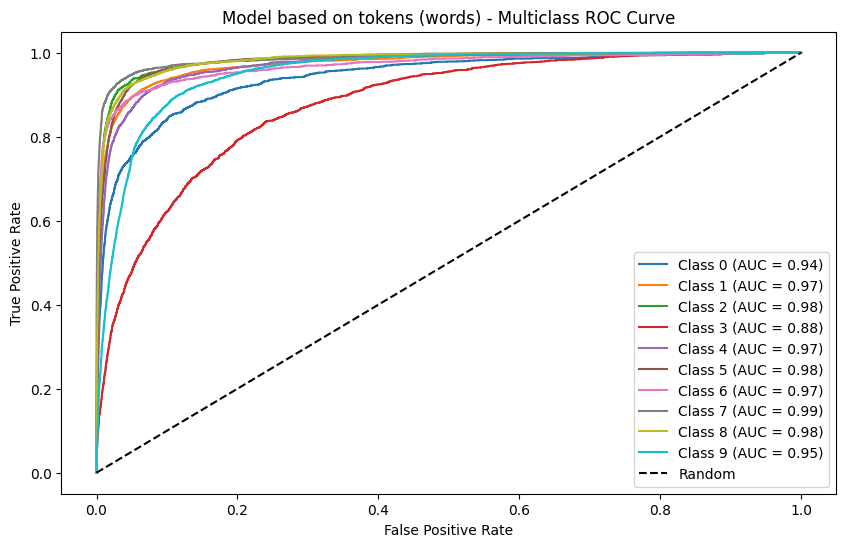

In [68]:

# Calculate and print the ROC AUC score for each class
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_pred_prob_token[:, i])
    roc_auc = auc(fpr, tpr)
    print(f'Class {i}: ROC AUC = {roc_auc:.4f}')

plt.figure(figsize=(10, 6))
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_pred_prob_token[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model based on tokens (words) - Multiclass ROC Curve')
plt.legend()
plt.show()

## Model based on morphosyntactic analysis

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Build a classification model using the training data. Use some form of morphosyntactic analysis (such as n-grams with lemmas, or filters for POS or stopwords). Evaluate the model on the test set. What ROC AUC score can you achieve?</td></tr>
</table>

<table>
<tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Note that each news articles includes two text fields, <i> headline </i> and <i> short_description </i>. It is recommended that you build a model that analyzes both texts to make the decision. You can build a Pipeline that takes both data inputs into account using <a href=https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html>ColumnTransformer</a> or join them in a single string.</td></tr>
</table>

<table>
<tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">
Remember that it is possible to speed up morphosyntactic analysis by deactivating certain components of the spaCy nlp model. Check the notebook for the corresponding exercise to remember how.</td></tr>
</table>

In [69]:
#### INSERT YOUR CODE HERE
!pip install spacy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [70]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [71]:
import spacy

# Specify the full path to the model data in Google Colab
data_path = spacy.load('en_core_web_sm').path

# Load the spaCy model
nlp = spacy.load(data_path)

In [72]:

# Load spaCy model with certain components disabled
nlpfast = spacy.load(data_path, disable=['ner', 'parser'])


In [73]:
print(X_train.shape)
print(len(y_train_encoded))

(83862, 1)
83862


In [ ]:


# # Create an instance of the CombineText transformer
# combine_text_transformer = CombineText()

# # Apply the transformer to the DataFrame
# combined_text_result_train = combine_text_transformer.fit_transform(X_train)
# combined_text_result_test = combine_text_transformer.fit_transform(X_test)

# # Add the result as a new column to the DataFrame
# X_train['combined_text'] = combined_text_result_train
# X_test['combined_text'] = combined_text_result_test

# # Display the updated DataFrame
# print(X_train)
# print(X_test)


                                                 headline  \
38292   House Republicans Drop Efforts To Gut Ethics W...   
890     NY Legislature Has Plan In Place To Consider R...   
53978   House Democrats Demanded Action On Guns, But A...   
41030   Queer Teens Juggle Identity And Conformity in ...   
137394  You're a 21st Century Shopper, Stop Overpaying...   
...                                                   ...   
140434                  The Best Butcher Shops in America   
187216  Getting The Best Of Ireland, Including Golf Ge...   
178067  Soul Songs: An Inspirational Playlist For Rain...   
1293    7 Places Prince Harry And Meghan Markle Might ...   
26407   AG Reverses Predecessor’s Memo Easing Drug Cri...   

                                        short_description  \
38292   Lawmakers, watchdog groups and the president-e...   
890     A bipartisan committee will look at successors...   
53978   These 10 fatal incidents help illustrate just ...   
41030   The clip aims t

In [74]:
def addanalyzed(df):
    analyzed = [nlp(text) for text in df["combined_text"]]
    df["analyzed"] = pd.Series(analyzed, index = df.index)

addanalyzed(X_train)
X_train.head()

,combined_text,analyzed
38292,House Republicans Drop Efforts To Gut Ethics W...,"(House, Republicans, Drop, Efforts, To, Gut, E..."
890,NY Legislature Has Plan In Place To Consider R...,"(NY, Legislature, Has, Plan, In, Place, To, Co..."
53978,"House Democrats Demanded Action On Guns, But A...","(House, Democrats, Demanded, Action, On, Guns,..."
41030,Queer Teens Juggle Identity And Conformity in ...,"(Queer, Teens, Juggle, Identity, And, Conformi..."
137394,"You're a 21st Century Shopper, Stop Overpaying...","(You, 're, a, 21st, Century, Shopper, ,, Stop,..."


In [75]:
addanalyzed(X_test)
X_test.head()

,combined_text,analyzed
13615,The Most Common Financial Mistakes To Avoid Ta...,"(The, Most, Common, Financial, Mistakes, To, A..."
156044,Chefs' Guide to San Francisco James Beard Awar...,"(Chefs, ', Guide, to, San, Francisco, James, B..."
83179,Why You Shouldn't Read Too Much Into Primary P...,"(Why, You, Should, n't, Read, Too, Much, Into,..."
58438,The 2016 Race Oddly Resembles 'Game Of Thrones...,"(The, 2016, Race, Oddly, Resembles, ', Game, O..."
148380,Boycotting the Winter Olympics Isn't Enough Wi...,"(Boycotting, the, Winter, Olympics, Is, n't, E..."


In [76]:
def addposfilter(df):
    posfilter = [" ".join([token.lemma_ for token in text
                           if token.pos_ in {"NOUN", "VERB", "ADJ", "ADV"} and not token.is_stop])
                 for text in df["analyzed"]]
    df["posfilter"] = pd.Series(posfilter, index = df.index)

addposfilter(X_train)
addposfilter(X_test)
X_train.head()

,combined_text,analyzed,posfilter
38292,House Republicans Drop Efforts To Gut Ethics W...,"(House, Republicans, Drop, Efforts, To, Gut, E...",drop effort watchdog group president critical
890,NY Legislature Has Plan In Place To Consider R...,"(NY, Legislature, Has, Plan, In, Place, To, Co...",plan consider replacement bipartisan committee...
53978,"House Democrats Demanded Action On Guns, But A...","(House, Democrats, Demanded, Action, On, Guns,...",demand keep kill fatal incident help illustrat...
41030,Queer Teens Juggle Identity And Conformity in ...,"(Queer, Teens, Juggle, Identity, And, Conformi...",clip aim help youth tell story authentically
137394,"You're a 21st Century Shopper, Stop Overpaying...","(You, 're, a, 21st, Century, Shopper, ,, Stop,...",21st stop overpay start passive shopper price ...


In [ ]:
import spacy
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV


# Load spaCy model
nlp = spacy.load('en_core_web_sm')


pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
    ]
)

params = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'vectorizer__analyzer' : ['word'],
    'vectorizer__ngram_range' : [(1, 1), (1,2), (1,3)]
}

model = GridSearchCV(pipeline, params, n_jobs = 7)


# Fit the model on the training data
model.fit(X_train['posfilter'], y_train_encoded)

# Predict the probabilities on the training set
y_pred = model.predict(X_train['posfilter'])

# Display the predictions
print("Predictions:", y_pred)


In [ ]:
# Get the best parameters
best_params = model.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'classifier__C': 0.1, 'vectorizer__analyzer': 'word', 'vectorizer__ngram_range': (1, 2)}


In [77]:

# Define the pipeline with the best parameters
best_params = {'classifier__C': 0.1, 'vectorizer__analyzer': 'word', 'vectorizer__ngram_range': (1, 2)}
final_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=best_params['vectorizer__analyzer'], ngram_range=best_params['vectorizer__ngram_range'])),
    ('classifier', LinearSVC(C=best_params['classifier__C']))
])

# Fit the final model on the training data
final_pipeline.fit(X_train['posfilter'], y_train_encoded)

# Predict the probabilities on the training set
y_pred = final_pipeline.predict(X_train['posfilter'])

# Display the predictions
print("Predictions:", y_pred)


Predictions: [5 5 5 ... 9 8 5]


In [78]:
# Predict the probabilities on the training set
y_train_pred_proba_ = final_pipeline.decision_function(X_train['posfilter'])

# Predict the probabilities on the test set
y_test_pred_proba_ = final_pipeline.decision_function(X_test['posfilter'])

# Display the predictions
print("Train set probabilities:", y_train_pred_proba_)
print("Test set probabilities:", y_test_pred_proba_)

Train set probabilities: [[-1.16 -0.85 -1.47 ... -1.55 -1.42 -1.31]
 [-1.29 -2.93 -1.77 ... -1.34 -1.37 -1.11]
 [-0.99 -1.1  -1.72 ... -1.6  -1.46 -1.17]
 ...
 [-1.35 -0.98 -1.49 ... -1.11 -1.42  0.81]
 [-1.   -0.65 -1.25 ... -0.62 -0.01 -1.26]
 [-1.19 -0.84 -1.43 ... -0.99 -1.21 -0.97]]
Test set probabilities: [[-0.79 -1.08 -0.45 ... -1.15 -1.09 -0.66]
 [-0.97 -1.56  0.15 ... -1.52 -0.59 -1.05]
 [-0.93 -0.83 -1.18 ... -0.93 -1.11 -0.71]
 ...
 [-0.91  0.11 -1.21 ... -0.87 -1.18 -1.28]
 [-1.32 -0.56 -1.16 ... -0.96 -1.31  0.47]
 [-1.08 -1.5  -1.14 ... -1.26 -0.85 -0.69]]


ROC AUC Score: 0.9065564348220647
Class 0: ROC AUC = 0.8767
Class 1: ROC AUC = 0.9038
Class 2: ROC AUC = 0.9549
Class 3: ROC AUC = 0.7988
Class 4: ROC AUC = 0.9317
Class 5: ROC AUC = 0.9261
Class 6: ROC AUC = 0.8634
Class 7: ROC AUC = 0.9521
Class 8: ROC AUC = 0.9333
Class 9: ROC AUC = 0.9247


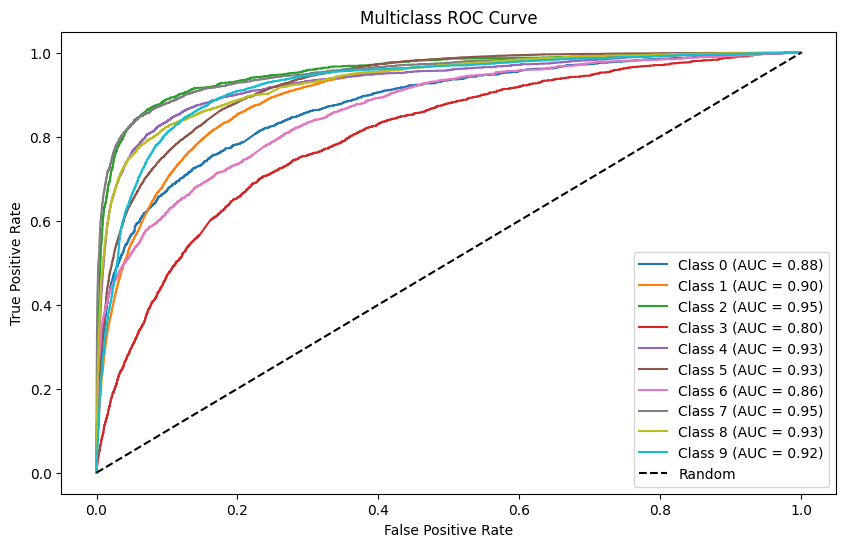

In [80]:
from sklearn.calibration import CalibratedClassifierCV

# Assuming you have already defined final_pipeline and X_test

# Calibrate the classifier to obtain probability estimates
calibrated_pipeline = CalibratedClassifierCV(final_pipeline, method='sigmoid', cv='prefit')
calibrated_pipeline.fit(X_train['posfilter'], y_train_encoded)

# Predict the probabilities on the test set
y_test_pred_proba_ = calibrated_pipeline.predict_proba(X_test['posfilter'])

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_encoded, y_test_pred_proba_, multi_class='ovr')

# Display the ROC AUC score
print("ROC AUC Score:", roc_auc)

# Calculate and print the ROC AUC score for each class
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_test_pred_proba_[:, i])
    roc_auc = auc(fpr, tpr)
    print(f'Class {i}: ROC AUC = {roc_auc:.4f}')

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_test_pred_proba_[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()


## Deep Learning model

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Build a classification model using the training data. Use an approach based on Embeddings and some kind of mix model (CNN, LSTM, GRU, ...). Evaluate the model on the test set. What ROC AUC score can you achieve?</td></tr>
</table>

In [91]:
#### INSERT YOUR CODE HERE
from keras.preprocessing.text import Tokenizer

In [92]:
maxwords = 15000
tokenizer = Tokenizer(num_words = maxwords)

In [107]:
X_train.head()

,headline,short_description,combined_text
38292,House Republicans Drop Efforts To Gut Ethics W...,"Lawmakers, watchdog groups and the president-e...",House Republicans Drop Efforts To Gut Ethics W...
890,NY Legislature Has Plan In Place To Consider R...,A bipartisan committee will look at successors...,NY Legislature Has Plan In Place To Consider R...
53978,"House Democrats Demanded Action On Guns, But A...",These 10 fatal incidents help illustrate just ...,"House Democrats Demanded Action On Guns, But A..."
41030,Queer Teens Juggle Identity And Conformity in ...,The clip aims to help youth tell their stories...,Queer Teens Juggle Identity And Conformity in ...
137394,"You're a 21st Century Shopper, Stop Overpaying...",When did we start becoming such passive shoppe...,"You're a 21st Century Shopper, Stop Overpaying..."


In [109]:
# We now need to fit the Tokenizer to the training texts, which can be done as follows:
tokenizer.fit_on_texts(X_train['combined_text'])

In [110]:
tokenizer.word_counts

OrderedDict([('mistake', 289),
             ('avoid', 817),
             ('control', 1135),
             ('money', 1658),
             ('chef', 288),
             ('guide', 1107),
             ('win', 1315),
             ('share', 1304),
             ('favorite', 1609),
             ('read', 1662),
             ('problem', 1307),
             ('especially', 797),
             ('primary', 630),
             ('oddly', 23),
             ('way', 6137),
             ('time', 9844),
             ('hand', 788),
             ('boycott', 93),
             ('failure', 381),
             ('government', 1284),
             ('act', 1060),
             ('voter', 614),
             ('war', 1296),
             ('death', 1603),
             ('community', 1232),
             ('action', 926),
             ('stoke', 24),
             ('fire', 635),
             ('fan', 500),
             ('flame', 38),
             ('people', 9206),
             ('listen', 615),
             ('recover', 108),
            

In [112]:
# Now the we have trained the tokenizer we can use it to vectorize the texts. In particular, we would like to transform the texts to sequences of word indexes.
# We can do this through the text_to_sequences method
X_train = tokenizer.texts_to_sequences(X_train['combined_text'])

In [113]:
X_train[0]

[158,
 329,
 1284,
 1817,
 2,
 2812,
 3053,
 5519,
 74,
 11861,
 4,
 2155,
 1223,
 5519,
 1297,
 5,
 1,
 105,
 1547,
 121,
 1541,
 4,
 1,
 453]

In [114]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'a': 3,
 'of': 4,
 'and': 5,
 'in': 6,
 'is': 7,
 'for': 8,
 'that': 9,
 'you': 10,
 'on': 11,
 'with': 12,
 'i': 13,
 'it': 14,
 'are': 15,
 'be': 16,
 'your': 17,
 'we': 18,
 'this': 19,
 'as': 20,
 'at': 21,
 'have': 22,
 'from': 23,
 'not': 24,
 'but': 25,
 'new': 26,
 'about': 27,
 'more': 28,
 'what': 29,
 'my': 30,
 'was': 31,
 'can': 32,
 'trump': 33,
 'how': 34,
 'an': 35,
 'our': 36,
 'or': 37,
 'by': 38,
 'has': 39,
 'all': 40,
 'time': 41,
 'one': 42,
 'out': 43,
 'when': 44,
 'people': 45,
 'will': 46,
 'up': 47,
 'day': 48,
 'his': 49,
 'who': 50,
 'their': 51,
 "it's": 52,
 'do': 53,
 'life': 54,
 'if': 55,
 'her': 56,
 'photos': 57,
 'they': 58,
 'like': 59,
 'year': 60,
 'just': 61,
 'get': 62,
 'so': 63,
 'know': 64,
 'he': 65,
 'want': 66,
 'make': 67,
 'way': 68,
 'us': 69,
 'some': 70,
 'most': 71,
 'no': 72,
 'than': 73,
 'after': 74,
 'say': 75,
 'good': 76,
 'there': 77,
 'love': 78,
 'need': 79,
 'why': 80,
 'health': 81,
 'world': 82,
 'o

In [115]:
X_test = tokenizer.texts_to_sequences(X_test['combined_text'])

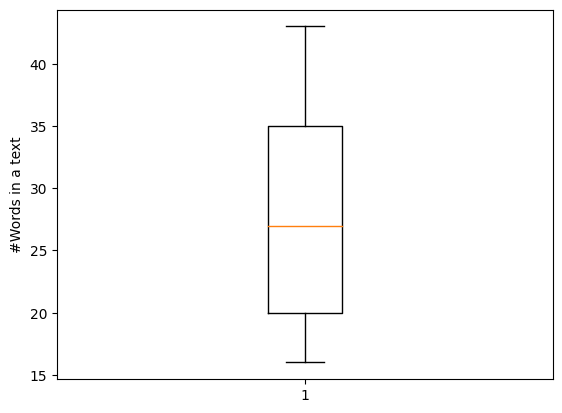

In [116]:
plt.boxplot([len(text) for text in X_train], whis=[15, 85], showfliers=False)
plt.ylabel("#Words in a text")
plt.show()

In [117]:
from keras.preprocessing.sequence import pad_sequences
maxsequence = 43
X_train = pad_sequences(X_train, maxlen=maxsequence)

In [118]:
X_test = pad_sequences(X_test, maxlen=maxsequence)

In [119]:
y_train

38292           POLITICS
890             POLITICS
53978           POLITICS
41030       QUEER VOICES
137394    STYLE & BEAUTY
               ...      
140434      FOOD & DRINK
187216            TRAVEL
178067          WELLNESS
1293              TRAVEL
26407           POLITICS
Name: category, Length: 83862, dtype: object

In [120]:
# One-hot encode the 'label' column
y_train_one_hot_encoded = pd.get_dummies(y_train)
y_test_one_hot_encoded = pd.get_dummies(y_test)


In [121]:
y_train_one_hot_encoded

,BUSINESS,ENTERTAINMENT,FOOD & DRINK,HEALTHY LIVING,PARENTING,POLITICS,QUEER VOICES,STYLE & BEAUTY,TRAVEL,WELLNESS
38292,0,0,0,0,0,1,0,0,0,0
890,0,0,0,0,0,1,0,0,0,0
53978,0,0,0,0,0,1,0,0,0,0
41030,0,0,0,0,0,0,1,0,0,0
137394,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
140434,0,0,1,0,0,0,0,0,0,0
187216,0,0,0,0,0,0,0,0,1,0
178067,0,0,0,0,0,0,0,0,0,1
1293,0,0,0,0,0,0,0,0,1,0


In [122]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Activation


model = Sequential()
model.add(Embedding(input_dim=maxwords, input_length=maxsequence, output_dim=64))
model.add(LSTM(32))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

model.fit(X_train, y_train_one_hot_encoded, batch_size=32, epochs=2, validation_data=(X_test, y_test_one_hot_encoded))

y_pred = model.predict(X_test)
print("AUC score", roc_auc_score(y_test_one_hot_encoded, y_pred, multi_class='ovr'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 43, 64)            960000    
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 972746 (3.71 MB)
Trainable params: 972746 (3.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
2621/2621 [==============================] - 114s 42ms/step - loss: 0.2290 - accuracy: 0.5027 - val_loss: 0.1523 - val_accuracy: 0.7078
Epoch 

AUC score (Keras): 0.954754202820169
Class 0: ROC AUC = 0.9085
Class 1: ROC AUC = 0.9694
Class 2: ROC AUC = 0.9741
Class 3: ROC AUC = 0.9010
Class 4: ROC AUC = 0.9639
Class 5: ROC AUC = 0.9802
Class 6: ROC AUC = 0.9405
Class 7: ROC AUC = 0.9796
Class 8: ROC AUC = 0.9702
Class 9: ROC AUC = 0.9601


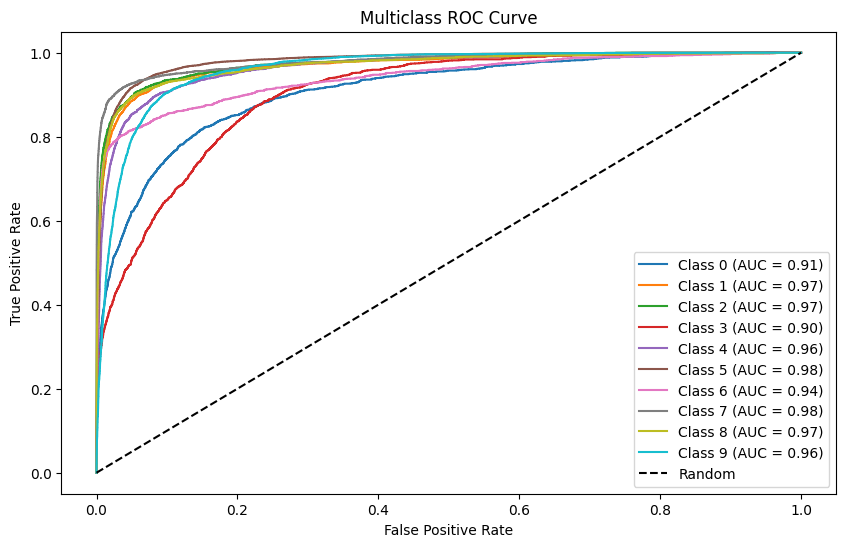

In [123]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


# Calculate the overall ROC AUC score
roc_auc_keras = roc_auc_score(y_test_one_hot_encoded, y_pred, multi_class='ovr')
print("AUC score (Keras):", roc_auc_keras)

# Calculate and print the ROC AUC score for each class
for i in range(y_test_one_hot_encoded.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_one_hot_encoded.iloc[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    print(f'Class {i}: ROC AUC = {roc_auc:.4f}')

# Plot the multiclass ROC curve
plt.figure(figsize=(10, 6))
for i in range(y_test_one_hot_encoded.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_one_hot_encoded.iloc[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()


## Visualization of results

<table align="left">
 <tr>
  <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">     Choose your best model and try to visualize which categories you classify worse. Why do you think it is? Can you find an example?
  </td>
 </tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Remember we did a visualization that can help you in the first lab but if you want you can use another
 </td></tr>
</table>

ROC AUC Score (Model based on characters): 0.9023653474470364
Class 0: ROC AUC = 0.8460
Class 1: ROC AUC = 0.9131
Class 2: ROC AUC = 0.9258
Class 3: ROC AUC = 0.8392
Class 4: ROC AUC = 0.9163
Class 5: ROC AUC = 0.9282
Class 6: ROC AUC = 0.8962
Class 7: ROC AUC = 0.9443
Class 8: ROC AUC = 0.9031
Class 9: ROC AUC = 0.9115
ROC AUC Score (Model based on words (token)): 0.9615730243807263
Class 0: ROC AUC = 0.9411
Class 1: ROC AUC = 0.9734
Class 2: ROC AUC = 0.9821
Class 3: ROC AUC = 0.8771
Class 4: ROC AUC = 0.9712
Class 5: ROC AUC = 0.9811
Class 6: ROC AUC = 0.9691
Class 7: ROC AUC = 0.9856
Class 8: ROC AUC = 0.9826
Class 9: ROC AUC = 0.9524
ROC AUC Score (Model based on morphosyntactic analysis): 0.9065564348220647
Class 0: ROC AUC = 0.8767
Class 1: ROC AUC = 0.9038
Class 2: ROC AUC = 0.9549
Class 3: ROC AUC = 0.7988
Class 4: ROC AUC = 0.9317
Class 5: ROC AUC = 0.9261
Class 6: ROC AUC = 0.8634
Class 7: ROC AUC = 0.9521
Class 8: ROC AUC = 0.9333
Class 9: ROC AUC = 0.9247
AUC score (Deep L

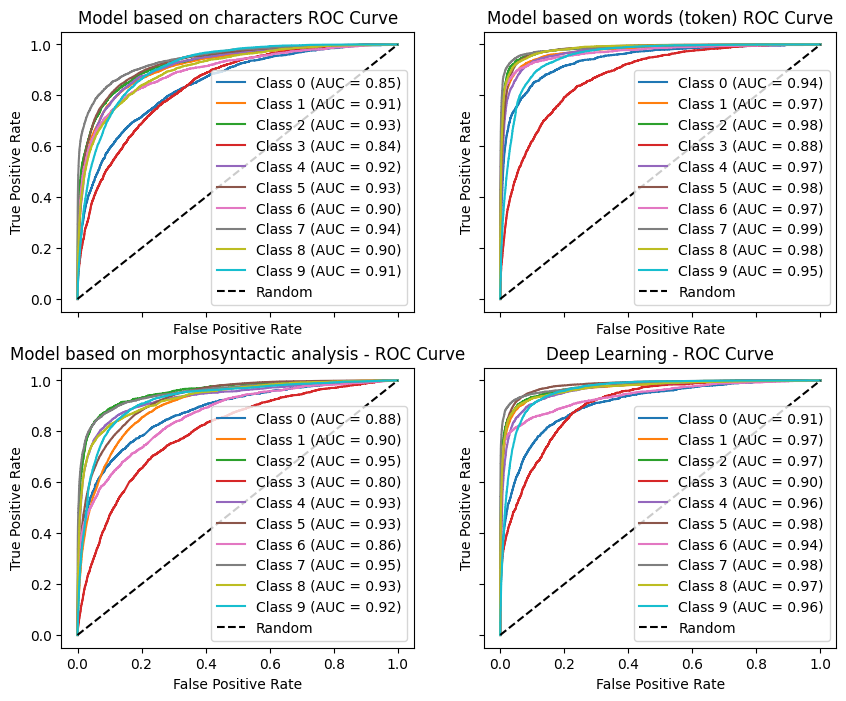

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [124]:
#### INSERT YOUR CODE HERE
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axs = axs.flatten()


# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr')

# Display the ROC AUC score
print("ROC AUC Score (Model based on characters):", roc_auc)

# Calculate and print the ROC AUC score for each class
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    print(f'Class {i}: ROC AUC = {roc_auc:.4f}')

plt.figure(figsize=(10, 6))
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[0].plot([0, 1], [0, 1], 'k--', label='Random')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Model based on characters ROC Curve')
axs[0].legend()




# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob_token, multi_class='ovr')

# Display the ROC AUC score
print("ROC AUC Score (Model based on words (token)):", roc_auc)

# Calculate and print the ROC AUC score for each class
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_pred_prob_token[:, i])
    roc_auc = auc(fpr, tpr)
    print(f'Class {i}: ROC AUC = {roc_auc:.4f}')

plt.figure(figsize=(10, 6))
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_pred_prob_token[:, i])
    roc_auc = auc(fpr, tpr)
    axs[1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[1].plot([0, 1], [0, 1], 'k--', label='Random')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Model based on words (token) ROC Curve')
axs[1].legend()





# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_encoded, y_test_pred_proba_, multi_class='ovr')

# Display the ROC AUC score
print("ROC AUC Score (Model based on morphosyntactic analysis):", roc_auc)

# Calculate and print the ROC AUC score for each class
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_test_pred_proba_[:, i])
    roc_auc = auc(fpr, tpr)
    print(f'Class {i}: ROC AUC = {roc_auc:.4f}')

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(set(y_test_encoded))):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_test_pred_proba_[:, i])
    roc_auc = auc(fpr, tpr)
    axs[2].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[2].plot([0, 1], [0, 1], 'k--', label='Random')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('Model based on morphosyntactic analysis - ROC Curve')
axs[2].legend()



# Calculate the overall ROC AUC score
roc_auc_keras = roc_auc_score(y_test_one_hot_encoded, y_pred, multi_class='ovr')
print("AUC score (Deep Learning):", roc_auc_keras)

# Calculate and print the ROC AUC score for each class
for i in range(y_test_one_hot_encoded.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_one_hot_encoded.iloc[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    print(f'Class {i}: ROC AUC = {roc_auc:.4f}')

# Plot the multiclass ROC curve
plt.figure(figsize=(10, 6))
for i in range(y_test_one_hot_encoded.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_one_hot_encoded.iloc[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    axs[3].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[3].plot([0, 1], [0, 1], 'k--', label='Random')
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Deep Learning - ROC Curve')
axs[3].legend()

plt.show()

## Report

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Write a short report explaining what decisions you have made when designing the model, what things you have tried, what has worked and what has not. In addition, <b>write a table comparing all the results</b> of the models obtained in this task. It is important to compare with the <b>same metric used</b>.</td></tr>
</table>

| ROC AUC Score (Model based on characters): 0.9023653474470364 | ROC AUC Score (Model based on words (token)): 0.9615730243807263 | ROC AUC Score (Model based on morphosyntactic analysis): 0.9065564179686512 | ROC AUC Score (Deep Learning): 0.954754202820169 |
| --- | --- | --- | --- |
| Class 0: ROC AUC = 0.8460 | Class 0: ROC AUC = 0.9411 | Class 0: ROC AUC = 0.8767 | Class 0: ROC AUC = 0.9085|
| Class 1: ROC AUC = 0.9131 | Class 1: ROC AUC = 0.9734 | Class 1: ROC AUC = 0.9038 | Class 1: ROC AUC = 0.9694 |
| Class 2: ROC AUC = 0.9258 | Class 2: ROC AUC = 0.9821 | Class 2: ROC AUC = 0.9549 | Class 2: ROC AUC = 0.9694 |
| Class 3: ROC AUC = 0.8392 | Class 3: ROC AUC = 0.8771 | Class 3: ROC AUC = 0.7988 | Class 3: ROC AUC = 0.9694 |
| Class 4: ROC AUC = 0.9163 | Class 4: ROC AUC = 0.9712 | Class 4: ROC AUC = 0.9317 | Class 4: ROC AUC = 0.9639 |
| Class 5: ROC AUC = 0.9282 | Class 5: ROC AUC = 0.9811 | Class 5: ROC AUC = 0.9261 | Class 5: ROC AUC = 0.9802|
| Class 6: ROC AUC = 0.8962 | Class 6: ROC AUC = 0.9691 | Class 6: ROC AUC = 0.8634 | Class 6: ROC AUC = 0.9405 |
| Class 7: ROC AUC = 0.9443 | Class 7: ROC AUC = 0.9856 | Class 7: ROC AUC = 0.9521 | Class 7: ROC AUC = 0.9796 |
| Class 8: ROC AUC = 0.9031 | Class 8: ROC AUC = 0.9826 | Class 8: ROC AUC = 0.9333 | Class 8: ROC AUC = 0.9702 |
| Class 9: ROC AUC = 0.9115 | Class 9: ROC AUC = 0.9524 | Class 9: ROC AUC = 0.9247 | Class 9: ROC AUC = 0.9601 |



We have decided to go for the metric ROC AUC, given that we have a classification problem and it's easy to discriminate between different classes.
Given the script, we have followed 4 different approaches to the problem.

The first thing we had done is to concatenate two of the columns of the dataframe, headline and short_description to create one column that we are going to use to do our models.

- **In the first approach**, we have built a model based on the **characteres of the text**. So I'll try to use an unigram model based.
To begin, we will construct a model that simply considers the type of characters that appear in the text to try to determine the language. This means that we will set up a process that converts a given text into a vector of character frequency and then apply a machine learning system to the obtained vectors.
I our case, I have use a **Bigram Model.**
Next, we will build a model that takes into account pairs of consecutive characters (bigrams) in the text to determine the language. This involves creating a process that converts a given text into a vector of bigram frequencies, which can then be used for applying a machine learning system to the obtained vectors.

We use a pipeline where we apply the countvectorizer algorithm, to see how many time a character appears in the text (in our case, 2-characters) and then the SGDClassifier, a linear SVM model whose implementation is specialized in working with large volumes of data.


- **In the second one**, we are going to use the **word tokenization** to discover the topics. The result of word tokenization is a sequence of words, making it easier to analyze and process the text at the word level.
On this occasion, we will use **TF-IDF **to begin with, which, by giving little weight to common words in the language, is a good starting point for detecting distinct conversation topics
After we are going to employ **Latent Dirichlet Allocation (LDA)**. LDA is an unsupervised method, which means it only requires the texts to work and does not need labeled information about the subjects of these texts. We just need to keep in mind that LDA does not work on raw texts; instead, it needs to receive a vector representation of them.

First, we are going to build a pipeline that resolves every set of variables separetly. We will start with the TF-IDF pipeline, then we are building a pipeline including LDA, but we need to use TF-IDF previously as explained above.

Then, we joined both pipelines using **FeatureUnion **.



- **The third model** is based on **morphosyntactic analysis**. We will take advantage of the morphological information provided by spaCy to enhance the predictive model. To achieve this, we will perform two operations:

    - Filter the texts to keep only those words from morphological categories with a higher emotional load.
    - Filter the texts to exclude stopwords.
    - Replace each token with its lemma to reduce the size of the vocabulary and simplify the problem.

To do all of this, we've designed the functions **addanalyzed** and **addposfilter**, creating two new columns in the dataframe. We'll used the columned created with addposfilter to apply our model. In this situation, we are going to created a GridSearchCV approach to look for the best params in our pipeline, which is created with CounVectorizer and LinearSVC as we've used in other approches above.

- **In the last model**, we are going to create a **Deep learning** model approach, in our case I'm going to use an **LSTM** model. The model consists of an embedding layer that transforms input sequences into dense vectors, followed by a Long Short-Term Memory (LSTM) layer with 32 units to capture sequential patterns. A dense layer with 10 units and a sigmoid activation function is added for the final classification. The model is compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the evaluation metric. It is then trained on the training data for two epochs, and its performance is evaluated on the test data. If no other parameters are given the LSTM will process the whole input sequence, and forward the computed document-level representation after processing the last element of the sequence. So it'll take into account the previous words, as it'll make an impact in the outcome.


Looking at the outcomes, I'll go for the deep learning model or for the model with tokens. Probably, if we don't have a lot of data, a model with tokens would be ok, however, as it's not really likely to happen, I'll go with the deep learning model. It's better to handle big amount of data and it take less data manipulation beforehand.